In [20]:
import requests
import requests.auth
import time
import praw # Guidance for utilizing PRAW and Reddit API's from Felippe Rodrigues http://www.storybench.org/how-to-scrape-reddit-with-python/
import pandas as pd
import datetime as dt
from requests import session

In [21]:
url = 'https://www.reddit.com/r/futurology.json'

In [22]:
headers = {'User-agent':'Diffuse_Singularity'}

In [23]:
params = {'limit': 100, 'after': None}

In [24]:
reddit = praw.Reddit(client_id='lx_lyM4sobJKGg',
                     client_secret='O5hSYfMlTDWUTCm5Dmi4zX3Zx64',
                     user_agent='<Python>:<General Assembly DSI; app for subreddits classification>:<v0.1> (by /u/<DiffuseSingularity>)',
                     username='DiffuseSingularity')

In [25]:
Futurology = reddit.subreddit('Futurology')
Worldnews = reddit.subreddit('Worldnews')

In [26]:
#for submission in Futurology.top(limit=1000):
 #   print(submission.title, submission.id)

In [27]:
# authors_Fut = []
# titles_Fut = []
# for submission in Futurology.top(limit=1000):
#     print(submission.author, submission.title)
#     authors_Fut.append(submission.author)
#     titles_Fut.append(submission.title)

In [28]:
dict_world = { "title":[],
               #"author":[],
                "score":[],
                "url":[]
                #"id":[], 
                }
for submission in Worldnews.top(limit=1000):
    dict_world["title"].append(submission.title)
    #try:
    #topics_dict_world["author"].append(submission.author)
    #except:
 #   topics_dict_world["author"]
    dict_world["score"].append(submission.score)
    dict_world["url"].append(submission.url)
    #topics_dict_world["id"].append(submission.id)
    #topics_dict_world["body"].append(submission.selftext)

In [29]:
dict_fut = { "title":[],
               #"author":[],
            "score":[],
            "url":[]
                }
for submission in Futurology.top(limit=1000):
    #try: 
        dict_fut["title"].append(submission.title)
    #except:
      #  topics_dict_fut["title"] = None
   # try: 
    #    topics_dict_fut["author"].append(submission.author.name)
    #except:
    #    topics_dict_fut["author"] = None #learned with Brendan Connolly that author draws from reddit even when these become dict objects, and if someone potentially deleted an account, that could trip things up.
    #try: 
        dict_fut["score"].append(submission.score)
    #except:
     #   topics_dict_fut["score"] = None
        dict_fut["url"].append(submission.url)

    #try: 
    #    topics_dict_fut["url"].append(submission.url)
    #except:
       # topics_dict_fut["url"] = None
    #topics_dict_fut["body"].append(submission.selftext)

In [30]:
print(dict_world)

{'title': ['Two weeks before his inauguration, Donald J. Trump was shown highly classified intelligence indicating that President Vladimir V. Putin of Russia had personally ordered complex cyberattacks to sway the 2016 American election', '2.6 terabyte leak of Panamanian shell company data reveals "how a global industry led by major banks, legal firms, and asset management companies secretly manages the estates of politicians, Fifa officials, fraudsters and drug smugglers, celebrities and professional athletes."', 'Churchill\'s grandson slams Trump for skipping cemetery visit because of weather: "They died with their face to the foe and that pathetic inadequate @realDonaldTrump couldn’t even defy the weather to pay his respects to The Fallen," Soames tweeted', 'Internet Defenders Urge Mass Revolt to Fight FCC\'s "Scorched-Earth" Attack on Net Neutrality: "FCC Pai is handing over the internet to a few humongous gatekeepers who see the rest of us as products to be delivered to advertiser

In [31]:
type(dict_fut)

dict

In [32]:
dict_fut

{'title': ['F.C.C. Announces Plan to Repeal Net Neutrality',
  "Elon Musk: We know we'll run out of dead dinosaurs to mine for fuel & have to use sustainable energy eventually, so why not go renewable now & avoid increasing risk of climate catastrophe? Betting that science is wrong & oil companies are right is the dumbest experiment in history by far.",
  'A Hawaiian Politician Is Introducing a Bill That Would Encourage Creation of Locally Owned Broadband Networks: "One option is to reject corporate internet service providers altogether, and control the internet ourselves."',
  'This Scientist Wants to Bring Star Trek Values to Congress - “one of a growing number of scientists who are running for public office... too many elected officials are ignorant of basic science, and that the only solution is for scientists to get in there and do a better job.”',
  "Stephen Hawking leaves behind 'breathtaking' final multiverse theory - A final theory explaining how mankind might detect parallel 

In [33]:
#topics_dict_fut.pop('author')

In [34]:
future_df = pd.DataFrame(dict_fut)

In [35]:
future_df.shape

(996, 3)

In [36]:
world_df = pd.DataFrame(dict_world)

In [37]:
world_df.shape

(997, 3)

In [38]:
future_df.head()

,title,score,url
0,F.C.C. Announces Plan to Repeal Net Neutrality,146295,https://www.nytimes.com/2017/11/21/technology/...
1,Elon Musk: We know we'll run out of dead dinos...,146043,https://www.cnbc.com/2018/12/14/elon-musk-this...
2,A Hawaiian Politician Is Introducing a Bill Th...,85235,https://motherboard.vice.com/en_us/article/paq...
3,This Scientist Wants to Bring Star Trek Values...,79522,https://www.wired.com/2017/12/geeks-guide-jess...
4,Stephen Hawking leaves behind 'breathtaking' f...,77278,https://www.telegraph.co.uk/science/2018/03/18...


In [39]:
dict_fut.keys()

dict_keys(['title', 'score', 'url'])

In [40]:
dict_world.keys()

dict_keys(['title', 'score', 'url'])

In [41]:
world_df = pd.DataFrame(dict_world)

In [42]:
world_df.head()

,title,score,url
0,"Two weeks before his inauguration, Donald J. T...",189354,https://www.nytimes.com/2018/07/18/world/europ...
1,2.6 terabyte leak of Panamanian shell company ...,154761,http://panamapapers.sueddeutsche.de/articles/5...
2,Churchill's grandson slams Trump for skipping ...,150174,https://thehill.com/homenews/administration/41...
3,Internet Defenders Urge Mass Revolt to Fight F...,145862,https://www.commondreams.org/news/2017/11/21/i...
4,Giraffes just silently went to the list of end...,141724,https://www.indiatoday.in/education-today/gk-c...


In [43]:
future_df.head()

,title,score,url
0,F.C.C. Announces Plan to Repeal Net Neutrality,146295,https://www.nytimes.com/2017/11/21/technology/...
1,Elon Musk: We know we'll run out of dead dinos...,146043,https://www.cnbc.com/2018/12/14/elon-musk-this...
2,A Hawaiian Politician Is Introducing a Bill Th...,85235,https://motherboard.vice.com/en_us/article/paq...
3,This Scientist Wants to Bring Star Trek Values...,79522,https://www.wired.com/2017/12/geeks-guide-jess...
4,Stephen Hawking leaves behind 'breathtaking' f...,77278,https://www.telegraph.co.uk/science/2018/03/18...


In [44]:
future_df['subreddit'] = "/r/futurology"

In [45]:
world_df['subreddit'] = "/r/worldnews"

In [46]:
df = pd.concat([world_df, future_df], axis=0, sort = True)

In [47]:
df.sort_values(['score'])

,score,subreddit,title,url
995,13015,/r/futurology,The United Nations is on the verge of calling ...,https://www.rt.com/uk/319072-un-drugs-decrimin...
994,13033,/r/futurology,India to make every single car electric by 203...,http://www.independent.co.uk/news/world/asia/i...
993,13046,/r/futurology,"Global warming must not exceed 1.5C, warns lan...",https://www.theguardian.com/environment/2018/o...
992,13051,/r/futurology,All Volvo models to become electrified from 2019,https://www.autocar.co.uk/car-news/new-cars/al...
991,13064,/r/futurology,Hawaii Eyes Offshore Wind to Reach its 100 Per...,https://insideclimatenews.org/news/07072016/ha...
990,13069,/r/futurology,Ireland votes to stop investing public money i...,https://www.engadget.com/2017/01/29/ireland-to...
989,13083,/r/futurology,"An autonomous system just launched, hoping to ...",https://www.theoceancleanup.com/technology/
988,13094,/r/futurology,Dubai wants 25% of its police force to be robo...,http://www.huffingtonpost.co.uk/entry/robot-po...
987,13122,/r/futurology,SpaceX makes aerospace history with successful...,http://www.theverge.com/2017/3/30/15117096/spa...
986,13125,/r/futurology,Tesla Wins Massive Contract to Help Power the ...,http://www.bloomberg.com/news/articles/2016-09...


In [48]:
#features = df[['title', 'score']

In [49]:
X = df['title']

In [50]:
X.head()

0    Two weeks before his inauguration, Donald J. T...
1    2.6 terabyte leak of Panamanian shell company ...
2    Churchill's grandson slams Trump for skipping ...
3    Internet Defenders Urge Mass Revolt to Fight F...
4    Giraffes just silently went to the list of end...
Name: title, dtype: object

In [51]:
y = df['subreddit']

In [52]:
df.isnull().sum()

score        0
subreddit    0
title        0
url          0
dtype: int64

In [53]:
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [55]:
cv = CountVectorizer(stop_words = stopwords.words('english'))

In [56]:
X_test

441    New York Health Officials See Marijuana as an ...
714    Emmanuel Macron to introduce new tax on expens...
484    A public relations disaster for United Airline...
620    The world is losing vital forests quicker than...
35     Apple, the world's most profitable firm, has a...
960    NVIDIA AI Car Demonstration: Unlike Google/Tes...
149    North Korea bans sarcasm because Kim Jong-un f...
729    UK Government Confirms Historic Low Emissions ...
382    Death For Rape Of Children Below 12, Says Indi...
741    Update: CRISPR co-inventor responds to claim o...
830    Urban 'forests' can store almost as much carbo...
541    Paris makes all public transport free in battl...
776    Prosecutors: Michael Cohen acted at Trump's di...
773    Today r/Futurology is going to #BreakTheIntern...
324    Trump has concealed details of his face-to-fac...
299    First single lens that can focus all colors of...
134    "This whole idea of terraforming Mars, as resp...
801    Japanese engineer builds

In [57]:
X_traincv = cv.fit_transform(X_train)
X_testcv = cv.transform(X_test)

In [58]:
X_traincv

<1494x6623 sparse matrix of type '<class 'numpy.int64'>'
	with 21445 stored elements in Compressed Sparse Row format>

In [59]:
lr = LogisticRegression()

In [60]:
lr.fit(X_traincv, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [61]:
lr.score(X_traincv, y_train)

0.9979919678714859

In [62]:
lr.score(X_testcv, y_test)

0.8557114228456913

In [63]:
df.to_csv('./dataframes/top_posts_update4_2019.csv')

In [64]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [72]:
df_string = ''  #After some frustration with trying a string method, Brendan Connelly 
for d in df['title']:
    df_string+=d

In [67]:
future_df_string = ''
for f in future_df['title']:
    future_df_string+=f

In [68]:
world_df_string = ''
for w in world_df['title']:
    world_df_string+=w

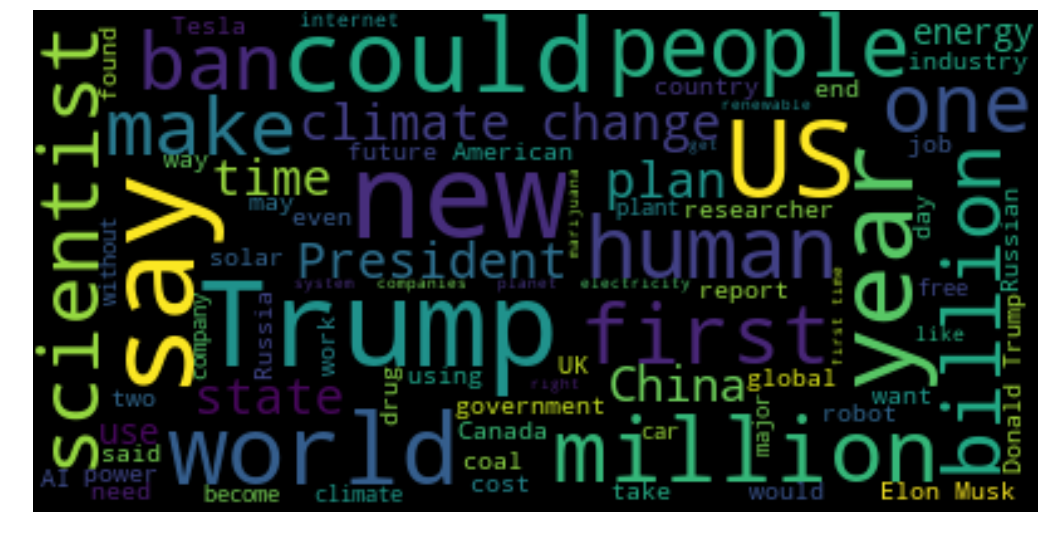

In [73]:
wordcloud = WordCloud(stopwords = stopwords.words('english'), max_font_size=50, max_words=80).generate(df_string)

plt.figure(figsize = (18, 18))
plt.imshow(wordcloud, interpolation='bilinear', )
plt.axis("off")
plt.show()

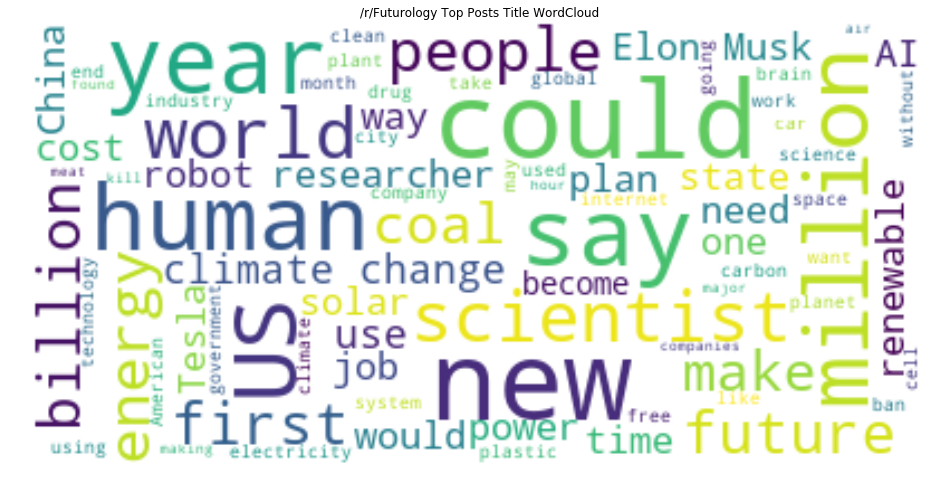

In [74]:
wordcloud = WordCloud(stopwords = stopwords.words('english'), max_font_size=50, max_words=80, background_color="white").generate(future_df_string)


plt.figure(figsize = (16, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("/r/Futurology Top Posts Title WordCloud")
plt.show()

In [75]:
world_df_string.stop

AttributeError: 'str' object has no attribute 'stop'

In [ ]:
wordcloud = WordCloud(stopwords = stopwords.words('english'), max_font_size=50, max_words=80, background_color="white").generate(world_df_string)

plt.figure(figsize = (16, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("/r/Worldnews Top Posts Title WordCloud")

plt.show()